## Práctica #1 - Entrenamiento del perceptrón 

**Profesor**: Luis Norberto Zúñiga Morales, Universidad Iberoamericana Ciudad de México

**Objetivos**:
- Introducir / recordar Python a los estudiantes.
- Implementar ideas básicas del perceptrón de Rosenblatt.
- Visualizar qué es lo que hace el perceptrón de Rosenblatt.

**Instrucciones**: 
- Realizar cada una de las actividades propuestas en este libro de Google Colab.
- Se puede realizar en equipos de 2 personas.
- Para la entrega de sus respuestas, es importante que la celda en cuestión se encuentre ejecutada para mostrar su resultados.
- Descargar su libro con terminación IPYNB y subirlo en la actividad correspondiente de Brigthspace.


In [1]:
# escribir sus nombres en las variables y ejecutar la celda
name1 = 'El Mau'
name2 = 'Andres'
print(name1,name2)

El Mau Andres


## Actividad 1

Vamos a escribir una función para determinar la salida de una neurona. Esta debe determinar la combinación de pesos y entradas en el primer paso, y ese resultado entra como argumento a la funión de activación. En general, se vería como sigue: 

```python
def compute_output(w,x):
  z = 0.0

  # combinacion de pesos y celdas (sumatoria)
  for i in range(len(w)):
    z += x[i]*w[i]
    
  # to do: modificar para que regrese -1 si la suma es menor que 0 y regrese 1 si la suma es mayor que cero
```

Noten que en el vector de entrada `x` el primer elemento debe ser 1, ya que representa el bias $x_0$ de la neurona. Es un supuesto de diseño que nosotros estamos planteando.

Lo que deben hacer es terminar la función `compute_output` para que utilice la función signo como función de activación:

\begin{equation}
    \text{sign}(x) =
    \begin{cases}
      -1 & \text{if } x < 0 \\
      1  & \text{if } x \geq 0
    \end{cases}
  \end{equation}

In [2]:
#su respuesta aqui
def compute_output(w,x):
  z = 0.0

  # combinacion de pesos y celdas (sumatoria)
  for i in range(len(w)):
    z += x[i]*w[i]

  # to do: implementar la funcion signo para que regrese -1 si z es menor que 0 y regrese 1 si z es mayor que cero
  if z < 0:
    return -1.0
  else:
    return 1.0

## Actividad 2

Utilizar la función `compute_output` para calcular las salidas de la red neuronal con función de activación signo con los pesos que se muestran en la imagen. 

Determinar los valores de salida de los vectores:



* [-1.0,-1.0]
* [-1.0,1.0]
* [1.0,-1.0]
* [1.0,1.0]




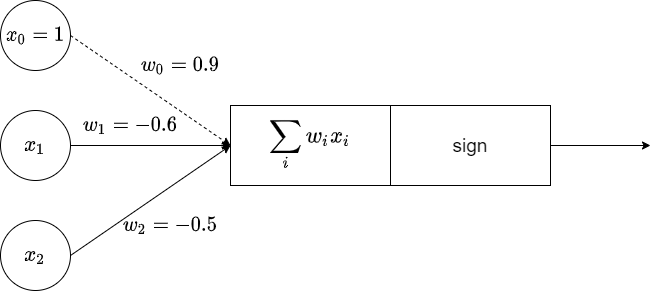

In [3]:
# to do: su codigo con la respuesta aqui
#vector[-1, -1]
compute_output([1.0,-1.0,-1.0],[0.9,-0.6,-0.5])

1.0

In [4]:
#vector [-1, 1]
compute_output([1.0,-1.0,1.0],[0.9,-0.6,-0.5])

1.0

In [5]:
#vector [1, -1]
compute_output([1.0,1.0,-1.0],[0.9,-0.6,-0.5])

1.0

In [6]:
#vector [1, 1]
compute_output([1.0,1.0,1.0],[0.9,-0.6,-0.5])

-1.0

## Actividad 3

Ahora vamos a implementar el algoritmo de entrenamiento del perceptrón. Empezamos definiendo parámetros y funciones auxiliares.

In [7]:
import random

In [8]:
def show_learning(w):
  print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1], ', w2 =', '%5.2f' % w[2])

In [9]:
# variables que controlan el entrenamiento
random.seed(7)
LEARNING_RATE = 0.1
index_list = [0,1,2,3]

# definimos ejemplos para el entrenamiento
X_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0), (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)] # x_i
y_train = [1.0, 1.0, 1.0, -1.0] # y_i

# definimos pesos del perceptron
w = [0.2, -0.6, 0.25]

show_learning(w)

w0 =  0.20 , w1 = -0.60 , w2 =  0.25


Vamos a definir el ciclo de entrenamiento del perceptrón. Para esto, necesitamos la función `compute_output` que definieron antes, por lo que verifiquen que funcione correctamente.

In [10]:
# loop de entrenamiento del perceptron
all_correct = False
while not all_correct:
  all_correct = True
  random.shuffle(index_list)
  for i in index_list:
    x = X_train[i]
    y = y_train[i]
    p_out = compute_output(w, x)

    if y!= p_out:
      for j in range(0,len(w)):
        w[j] += (y * LEARNING_RATE * x[j])
      all_correct = False
      show_learning(w)

w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


Comprobar NAND con nuevos pesos

In [11]:
# to do: su codigo con la respuesta aqui
#vector[-1, -1]
compute_output([1.0,-1.0,-1.0],[0.40,-0.40,-0.15])

1.0

In [12]:
#vector [-1, 1]
compute_output([1.0,-1.0,1.0],[0.40,-0.40,-0.15])

1.0

In [13]:
#vector [1, -1]
compute_output([1.0,1.0,-1.0],[0.40,-0.40,-0.15])

1.0

In [14]:
#vector [1, 1]
compute_output([1.0,1.0,1.0],[0.40,-0.40,-0.15])

-1.0

## Actividad 4

Vamos a modificar un poco la función que muestra el aprendizaje `show_learning` para que muestre gráficamente lo que hace. El borde de decisión (para $\mathbb{R}^2$) se define como el punto donde la suma ponderada es igual a cero, que es el punto donde la función signo cambia de valor:

$$w_0x_0 + w_1x_1 + w_2x_2 = 0$$

Dado que dicho margen de decisión es una recta en este caso, podemos graficar $x_2$ en términos de $x_1$ de la siguiente manera:

$$x_2 = -\frac{w_1}{w_2}x_1 - \frac{w_0}{w_2}$$

In [15]:
import matplotlib.pyplot as plt

In [16]:
# algunas variables necesarias para la grafica
color_list = ['r-', 'm-', 'y-', 'c-', 'b-', 'g-']
color_index = 0

In [17]:
def show_learning_2(w):
  global color_index
  print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1], ', w2 =', '%5.2f' % w[2])

  if color_index == 0:
    plt.plot([1.0], [1.0], 'b_', markersize=12)
    plt.plot([-1.0, 1.0, -1.0], [1.0, -1.0, -1.0], 'r+', markersize=12)
    plt.axis([-2, 2, -2, 2])
    plt.xlabel('x1')
    plt.ylabel('x2')
  x = [-2.0, 2.0]
  if abs(w[2]) < 1e-5:
    y = [-w[1]/(1e-5) * (-2.0) + (-w[0]/(1e-5)), -w[1]/(1e-5) * (2.0) + (-w[0]/(1e-5))]
  else:
    y = [-w[1]/w[2] * (-2.0) + (-w[0]/w[2]), -w[1]/w[2] * (2.0) + (-w[0]/w[2])]
  
  plt.plot(x,y, color_list[color_index])
  if color_index < (len(color_list)- 1):
    color_index += 1

Volvemos a ejecutar el entrenamiento del perceptrón con la nueva función para visualizar el proceso. Les debe salir algo así:

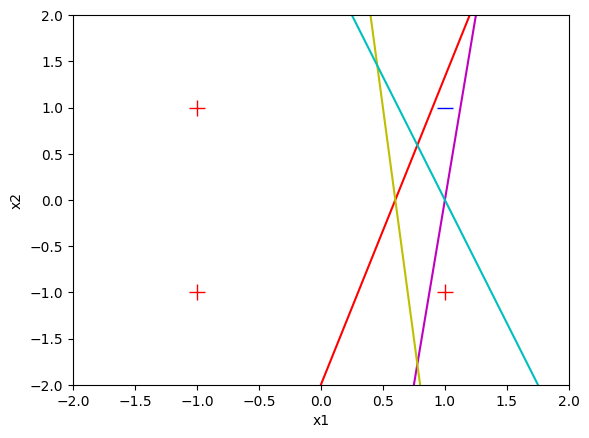

w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


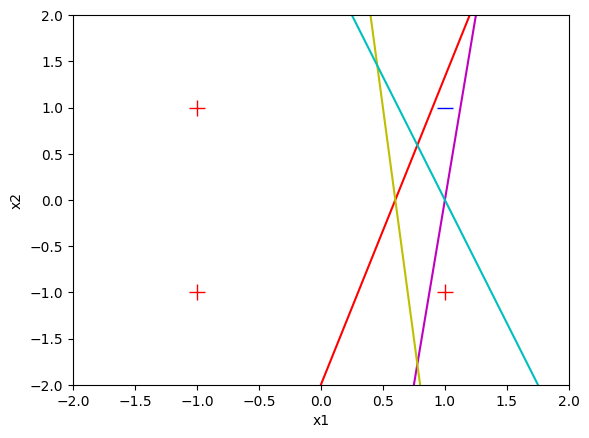

In [18]:
# variables que controlan el entrenamiento
random.seed(7)
LEARNING_RATE = 0.1
index_list = [0,1,2,3]

# definimos ejemplos para el entrenamiento
X_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0), (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)] # x_i
y_train = [1.0, 1.0, 1.0, -1.0] # y_i

# definimos pesos del perceptron
w = [0.2, -0.6, 0.25]

# loop de entrenamiento del perceptron
all_correct = False
while not all_correct:
  all_correct = True
  random.shuffle(index_list)
  for i in index_list:
    x = X_train[i]
    y = y_train[i]
    p_out = compute_output(w, x)

    if y!= p_out:
      for j in range(0,len(w)):
        w[j] += (y * LEARNING_RATE * x[j])
      all_correct = False
      show_learning_2(w)

plt.show()

## Tarea



1.   Investigar sobre las limitaciones del perceptrón (i.e., tiene problemas para representar el XOR).
2.   Modificar el programa para que el perceptrón intente separar el XOR en dos variables. Mostrar las distintas rectas que surgen durante el entrenamiento y escribir sus conclusiones.



1. El problema de determinar XOR con la neuroma de McCulloch y Pitts y el perceptrón
La neurona de McCulloch y Pitts y el perceptrón solamente podía hacer divisiones de manera lineal; es un
margen de decisión lineal. XOR requiere de un margen de decisión no lineal. Para poder hacer decisiones de manera no lineal se requiere una red neuronal,
no se puede hacer solamente con una neurona; hay que apilar perceptrones. En 1969 Marvin Minsky, en Perceptron’s
– An Introduction to Computational Geometry argumenta que los perceptrones y la neurona
de McCulloch y Pitts y/o el perceptrón no funciona ya que no puede resolver problemas no lineales como la
función XOR.

2 Problema Modificado

In [ ]:
# variables que controlan el entrenamiento
random.seed(7)
LEARNING_RATE = 0.1
index_list = [0,1,2,3]

# definimos ejemplos para el entrenamiento
X_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0), (1.0, 1.0, -1.0), (1.0, 1.0, 1.0)] # x_i
y_train = [-1.0, 1.0, 1.0, -1.0] # y_i

# definimos pesos del perceptron
w = [0.2, -0.6, 0.25]

# loop de entrenamiento del perceptron
all_correct = False
while not all_correct:
  all_correct = True
  random.shuffle(index_list)
  for i in index_list:
    x = X_train[i]
    y = y_train[i]
    p_out = compute_output(w, x)

    if y!= p_out:
      for j in range(0,len(w)):
        w[j] += (y * LEARNING_RATE * x[j])
      all_correct = False
      show_learning_2(w)

plt.show()

En conclusion nunca llegaría a una solución por no ser linealmente separable

El auditorio no llega a converger